In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/tmp/ipykernel_14737/3809791425.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
path = 'datasets'

files = [f for f in os.listdir(path) if f.endswith('.csv')][:8]
all_dataframes = []

In [4]:
# data extraction
for file in files:
    full_path = os.path.join(path, file)
    df = pd.read_csv(full_path)

    name_part = os.path.basename(file).replace('.csv', '')
    df['name'] = name_part
    df['dates'] = pd.to_datetime(df['review_dates'])
    df['dates'] = df['dates'].dt.date

    df['сondition'] = df['review_titles']
    df['сondition'] = df['сondition'].str.strip()
    df.loc[df['сondition'] == '', 'сondition'] = pd.NA

    df['overall rating'] = df['review_ratings'].astype(float)

    df = df[['name', 'dates', 'сondition', 'overall rating', 'reviews']]

    all_dataframes.append(df)

In [5]:

combined_df = pd.concat(all_dataframes, ignore_index=True)
combined_df.insert(0, 'ID', range(1, len(combined_df) + 1))
combined_df.head(100)

,ID,name,dates,сondition,overall rating,reviews
0,1,B009SZXM4E,2023-05-26,Unlock Your Beauty Potential with Nature's Bou...,5.0,I am excited to share my experience with Natur...
1,2,B009SZXM4E,2024-01-02,Good value,5.0,I've taken biotin for yrs. Started purchasing ...
2,3,B009SZXM4E,2022-02-19,Works every time for fast hair growth,5.0,Without fail my hair growth is bananas. At one...
3,4,B009SZXM4E,2023-10-06,Doesn't Work For Me,4.0,I started losing my hair due to a major illnes...
4,5,B009SZXM4E,2024-01-05,Helps my hair and nails,5.0,I love that these are soft gels because I thin...
...,...,...,...,...,...,...
95,96,B009SZXM4E,2023-01-15,Works Great for Some People,4.0,This supplement works great for my husband who...
96,97,B009SZXM4E,2023-08-10,Bueno,4.0,Me gustó
97,98,B009SZXM4E,2023-07-24,Amazing,4.0,"After taking these vitamins, I felt a signific..."
98,99,B009SZXM4E,2023-09-03,Didn’t think it would work,5.0,I am pleasantly surprised as to how much more ...


In [6]:
combined_df.to_csv("combined_data.csv", index=False)

In [7]:
#data analysis
print('number of rows, columns', combined_df.shape)
combined_df.info()

number of rows, columns (1000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1000 non-null   int64  
 1   name            1000 non-null   object 
 2   dates           1000 non-null   object 
 3   сondition       1000 non-null   object 
 4   overall rating  1000 non-null   float64
 5   reviews         1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [8]:
combined_df.describe()

,ID,overall rating
count,1000.000000,1000.000000
mean,500.500000,4.267000
std,288.819436,1.345928
min,1.000000,1.000000
25%,250.750000,4.000000
50%,500.500000,5.000000
75%,750.250000,5.000000
max,1000.000000,5.000000


In [10]:
combined_df['dates'] = pd.to_datetime(combined_df['dates'])
combined_df['сondition'] = combined_df['сondition'].astype('category')
combined_df['name'] = combined_df['name'].astype('string')
combined_df['reviews'] = combined_df['reviews'].astype('string')

In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              1000 non-null   int64         
 1   name            1000 non-null   string        
 2   dates           1000 non-null   datetime64[ns]
 3   сondition       1000 non-null   category      
 4   overall rating  1000 non-null   float64       
 5   reviews         1000 non-null   string        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), string(2)
memory usage: 62.1 KB


In [13]:
#missing values
combined_df.isnull().sum()

ID                0
name              0
dates             0
сondition         0
overall rating    0
reviews           0
dtype: int64

In [14]:
#unique values
combined_df.nunique()

ID                1000
name                 5
dates              244
сondition          608
overall rating       5
reviews            666
dtype: int64

In [15]:
# dates column
combined_df['dates'].describe()

count                          1000
mean     2023-09-13 03:05:45.600000
min             2012-11-21 00:00:00
25%             2023-09-28 00:00:00
50%             2023-11-11 00:00:00
75%             2023-12-15 00:00:00
max             2024-01-18 00:00:00
Name: dates, dtype: object

In [16]:
combined_df['dates'].value_counts()

dates
2024-01-10    19
2023-12-09    17
2023-12-10    17
2023-12-24    16
2023-12-16    15
              ..
2023-04-02     1
2021-04-21     1
2015-04-17     1
2016-09-30     1
2023-10-29     1
Name: count, Length: 244, dtype: int64

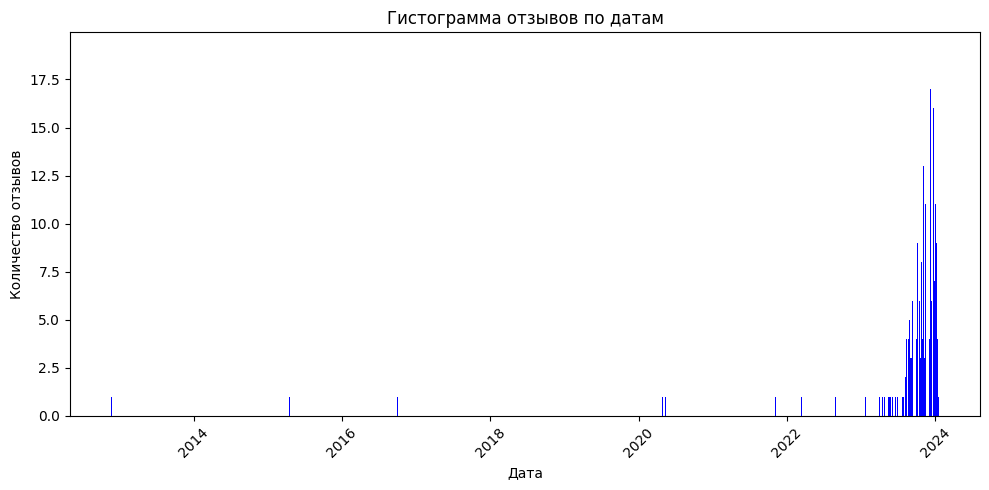

In [17]:
combined_df['dates'] = pd.to_datetime(combined_df['dates'])
review_counts = combined_df.groupby('dates')['reviews'].count().reset_index(name='review_count')

plt.figure(figsize=(10, 5))
plt.bar(review_counts['dates'], review_counts['review_count'], color='blue')

plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество отзывов')
plt.title('Гистограмма отзывов по датам')

plt.tight_layout()
plt.show()

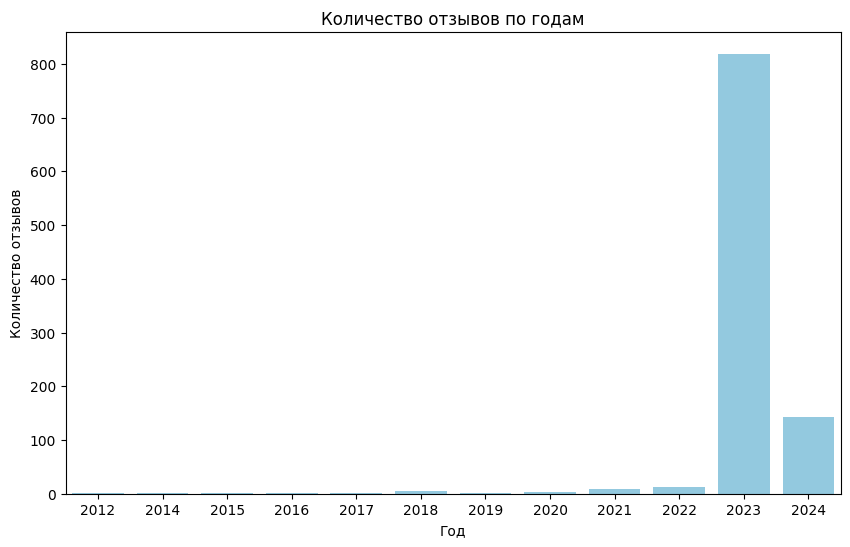

In [18]:
combined_df['year'] = combined_df['dates'].dt.year
reviews_per_year = combined_df.groupby('year').size().reset_index(name='review_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='review_count', data=reviews_per_year, color='skyblue')

plt.xlabel('Год')
plt.ylabel('Количество отзывов')
plt.title('Количество отзывов по годам')
plt.show()

combined_df = combined_df.drop('year', axis=1)

In [19]:
# name column
combined_df['name'].value_counts()

name
B009SZXM4E    200
B000OA6Z6O    200
B07S38C5WW    200
B002EA99HE    200
B07GSGWZMB    200
Name: count, dtype: Int64

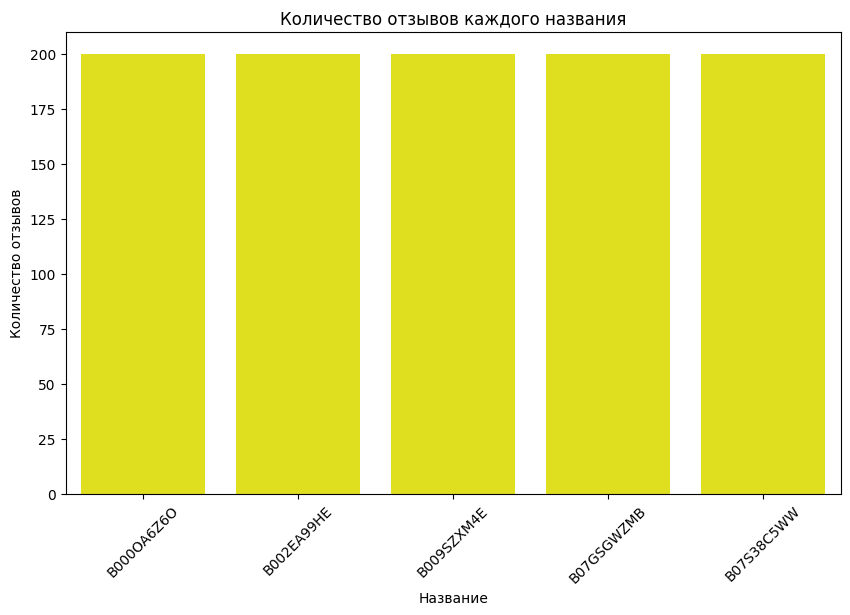

In [20]:
review_counts = combined_df.groupby('name')['reviews'].count().reset_index(name='review_count')
review_name = combined_df.groupby('name').size().reset_index(name='review_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='review_count', data=review_name, color='yellow')

plt.xticks(rotation=45)

plt.xlabel('Название')
plt.ylabel('Количество отзывов')
plt.title('Количество отзывов каждого названия')

plt.show()

/tmp/ipykernel_14737/992810647.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_counts = combined_df.groupby('сondition')['reviews'].count().reset_index(name='review_count')
/tmp/ipykernel_14737/992810647.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_cond = combined_df.groupby('сondition').size().reset_index(name='review_count')
/home/egor/anaconda3/envs/regina/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/egor/anaconda3/envs/regina/lib/python3.10/site

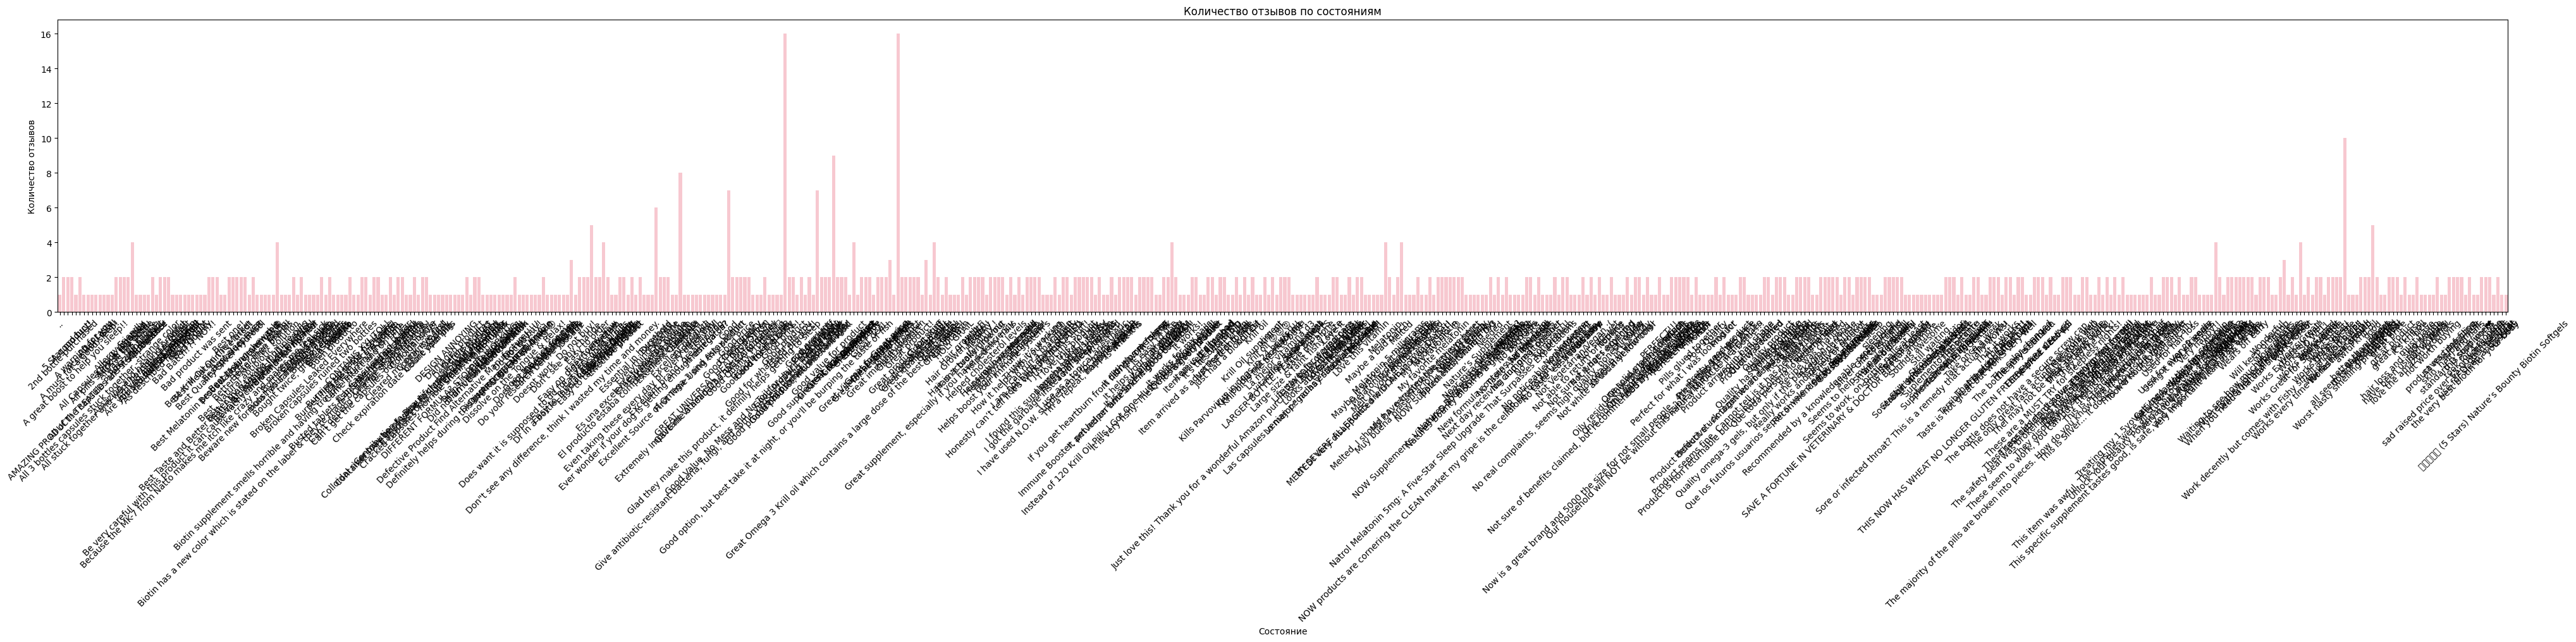

In [21]:
# сondition column
review_counts = combined_df.groupby('сondition')['reviews'].count().reset_index(name='review_count')
review_cond = combined_df.groupby('сondition').size().reset_index(name='review_count')

plt.figure(figsize=(50, 6))
sns.barplot(x='сondition', y='review_count', data=review_cond, color='pink')

plt.xticks(rotation=45)

plt.xlabel('Состояние')
plt.ylabel('Количество отзывов')
plt.title('Количество отзывов по состояниям')

plt.show()

/home/egor/anaconda3/envs/regina/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


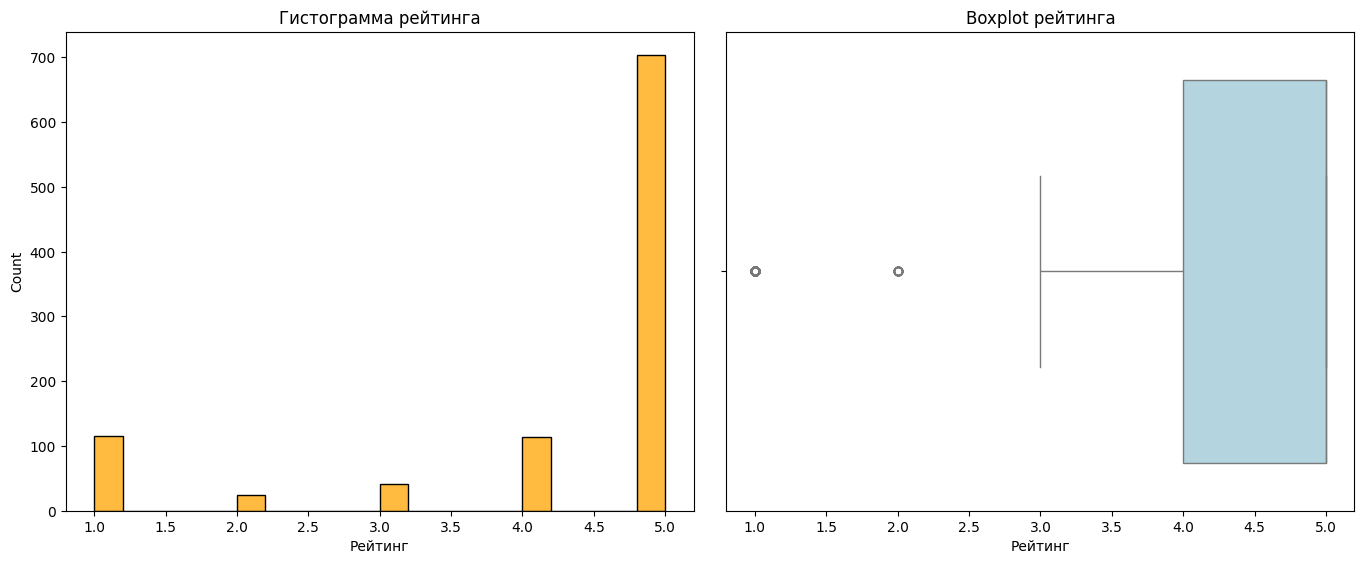

In [22]:
# overall rating column
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['overall rating'], kde=False, color='orange')
plt.title('Гистограмма рейтинга')
plt.xlabel('Рейтинг')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df['overall rating'], color='lightblue')
plt.title('Boxplot рейтинга')
plt.xlabel('Рейтинг')

plt.tight_layout(pad=2)
plt.show()

In [23]:
combined_df['overall rating'].value_counts()

overall rating
5.0    704
1.0    115
4.0    114
3.0     42
2.0     25
Name: count, dtype: int64

In [24]:
combined_df['overall rating'].describe()

count    1000.000000
mean        4.267000
std         1.345928
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: overall rating, dtype: float64

In [28]:
%pip install spacy
%pip install nltk
%pip install scikit-learn
%pip install gensim
%pip install wordcloud
%pip install textblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.0 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
# review column
import nltk
import seaborn as sns
import sklearn
import gensim
#import pyLDAvis
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
#import textstat

Text(0.5, 1.0, 'Length of Reviews Distribution')

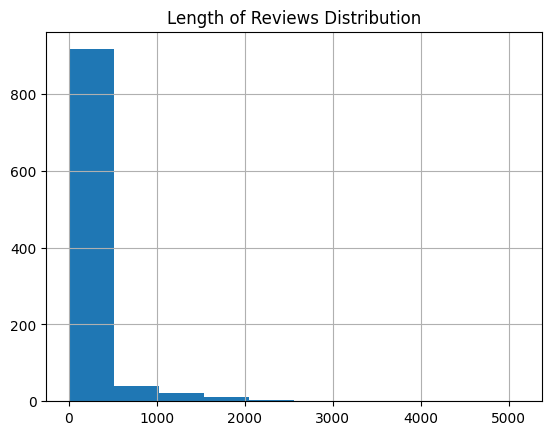

In [30]:
combined_df['reviews'].str.len().hist()
plt.title('Length of Reviews Distribution')

Text(0.5, 1.0, 'the number of words')

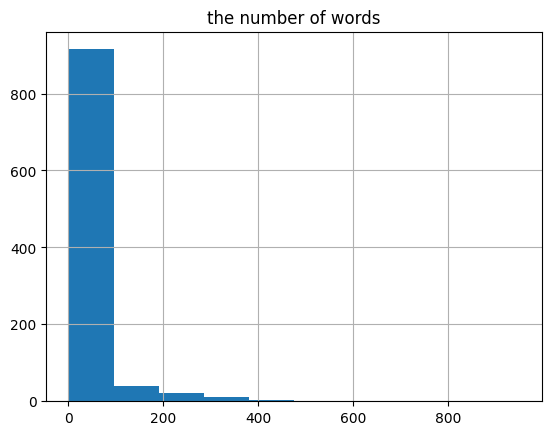

In [31]:
df1 = combined_df.dropna(subset=['reviews'])
df1['reviews'].str.split().apply(lambda x: len(x)).hist()
plt.title('the number of words')

Text(0.5, 1.0, 'average word length')

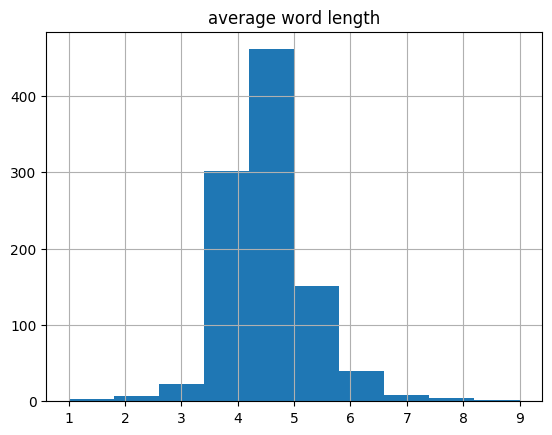

In [32]:
df1['reviews'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('average word length')

In [33]:
# data cleaning
df = combined_df.dropna(subset=['reviews'])
df = df.drop_duplicates()

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/egor/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
corpus=[]

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= df['reviews'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

Text(0.5, 1.0, 'stopwords')

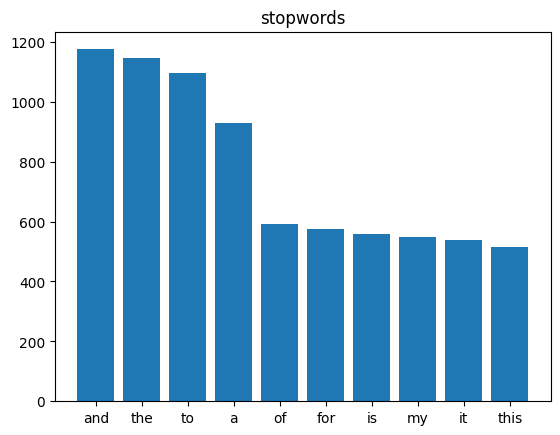

In [36]:
plot_top_stopwords_barchart(df['reviews'])
plt.title('stopwords')

In [37]:
from collections import  Counter
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= df['reviews'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'non stopwords')

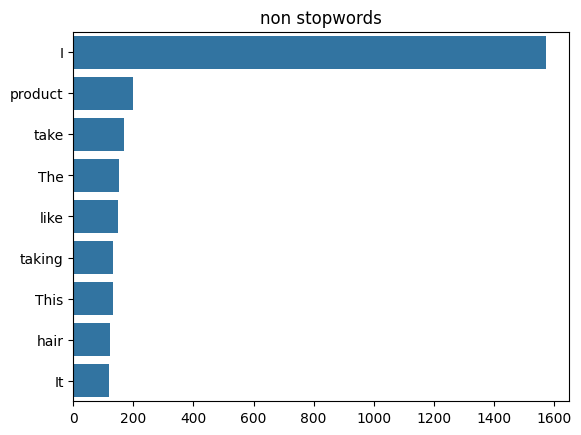

In [38]:
plot_top_non_stopwords_barchart(df['reviews'])
plt.title('non stopwords')

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new = df['reviews'].str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'top bigrams')

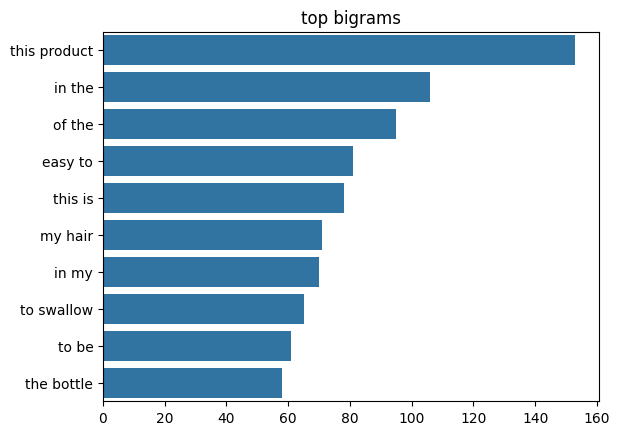

In [41]:
plot_top_ngrams_barchart(df['reviews'],2)
plt.title('top bigrams')

Text(0.5, 1.0, 'top trigrams')

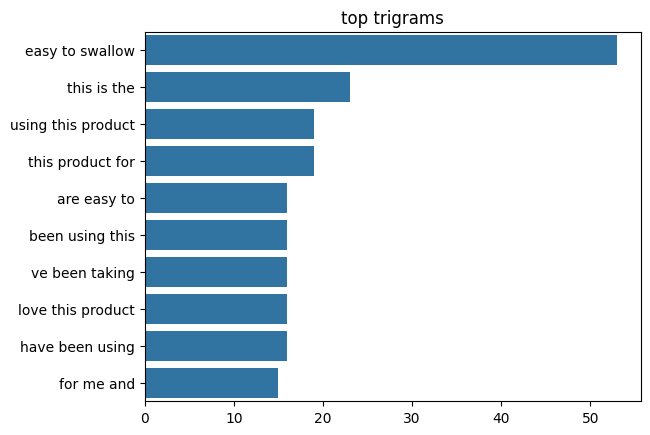

In [42]:
plot_top_ngrams_barchart(df['reviews'],3)
plt.title('top trigrams')

In [55]:
# handling missing values
# df['age'] = pd.to_numeric(df['age'], errors='coerce')
# df['age'] = df['age'].fillna(df['age'].median()).astype('int64')

# df['duration, months'] = pd.to_numeric(df['duration, months'], errors='coerce')
# df['duration, months'] = df['duration, months'].fillna(df['duration, months'].median()).astype('int64')

#df['сondition'] = df['сondition'].cat.add_categories('Other')
#df['сondition'].fillna('Other', inplace=True)

ValueError: new categories must not include old categories: {'Other'}

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              1000 non-null   int64         
 1   name            1000 non-null   string        
 2   dates           1000 non-null   datetime64[ns]
 3   сondition       1000 non-null   category      
 4   overall rating  1000 non-null   float64       
 5   reviews         1000 non-null   string        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), string(2)
memory usage: 62.1 KB


In [50]:
df.head(80)

,ID,name,dates,сondition,overall rating,reviews
0,1,B009SZXM4E,2023-05-26,Unlock Your Beauty Potential with Nature's Bou...,5.0,I am excited to share my experience with Natur...
1,2,B009SZXM4E,2024-01-02,Good value,5.0,I've taken biotin for yrs. Started purchasing ...
2,3,B009SZXM4E,2022-02-19,Works every time for fast hair growth,5.0,Without fail my hair growth is bananas. At one...
3,4,B009SZXM4E,2023-10-06,Doesn't Work For Me,4.0,I started losing my hair due to a major illnes...
4,5,B009SZXM4E,2024-01-05,Helps my hair and nails,5.0,I love that these are soft gels because I thin...
...,...,...,...,...,...,...
75,76,B009SZXM4E,2023-10-09,Stack it with other products,5.0,This product on its on will work but if you wa...
76,77,B009SZXM4E,2023-08-09,Biotin has a new color which is stated on the ...,5.0,I have been using these pills for over a year....
77,78,B009SZXM4E,2024-01-07,supplement,3.0,does as described
78,79,B009SZXM4E,2023-07-20,⭐️⭐️⭐️⭐️⭐️ (5 Stars) Nature’s Bounty Biotin So...,5.0,⭐️⭐️⭐️⭐️⭐️ (5 Stars) Nature’s Bounty Biotin ha...


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              1000 non-null   int64         
 1   name            1000 non-null   string        
 2   dates           1000 non-null   datetime64[ns]
 3   сondition       1000 non-null   category      
 4   overall rating  1000 non-null   float64       
 5   reviews         1000 non-null   string        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), string(2)
memory usage: 62.1 KB


In [52]:
#missing values
df.isnull().sum()

ID                0
name              0
dates             0
сondition         0
overall rating    0
reviews           0
dtype: int64

In [53]:
df.to_csv("cleaned_data.csv", index=False)